In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pickle
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
import pmdarima as pm
from sklearn.linear_model import LinearRegression


In [2]:
with open("arima_model.pkl", 'rb') as file:
    arima_model = pickle.load(file)


In [3]:
# Define the start and end dates for your forecast period
forecast_start_date = pd.to_datetime("2023-12-01")
forecast_end_date = pd.to_datetime("2024-11-30")

# Calculate the number of months between the start and end dates
forecast_steps = (forecast_end_date - forecast_start_date).days // 30

# Make the one-year forecast
forecast = arima_model.predict(n_periods=forecast_steps, dynamic=False)

# Create a date range for the forecasted period
forecast_index = pd.date_range(
    start=forecast_start_date, periods=forecast_steps + 1, freq='M')[1:]

# Create the forecast DataFrame
forecast_df = pd.DataFrame(
    forecast, index=forecast_index, columns=["Forecasted Values"])


In [4]:
forecast_df


,Forecasted Values
2024-01-31,1347.876662
2024-02-29,1350.696804
2024-03-31,1350.260864
2024-04-30,1353.265412
2024-05-31,1350.991030
2024-06-30,1346.216775
2024-07-31,1346.330583
2024-08-31,1354.794531
2024-09-30,1351.721700
2024-10-31,1351.490250


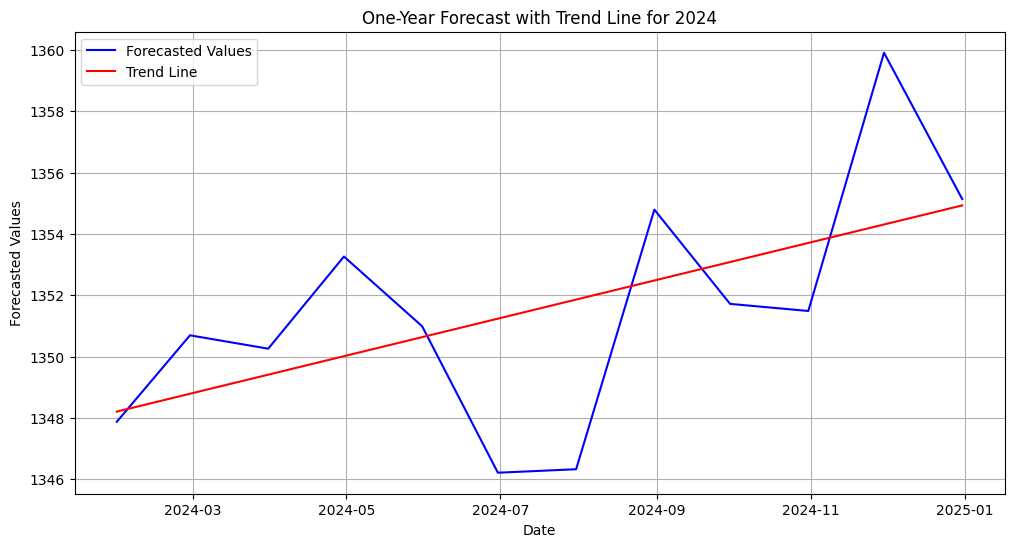

In [5]:
x = np.array([i.toordinal() for i in forecast_df.index])
y = forecast_df["Forecasted Values"]

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index,forecast_df["Forecasted Values"], label="Forecasted Values", color="blue")

# Add the trend line
plt.plot(forecast_df.index, y_pred, label="Trend Line", color="red")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Forecasted Values")
plt.title("One-Year Forecast with Trend Line for 2024")

# Display a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [6]:
# Define the start and end dates for your forecast period
forecast_start_date = pd.to_datetime("2024-01-01")
forecast_end_date = pd.to_datetime("2024-12-31")

# Calculate the number of days between the start and end dates
forecast_steps = (forecast_end_date - forecast_start_date).days

# Make the one-year forecast
forecast = arima_model.predict(n_periods=forecast_steps, dynamic=False)

# Create a date range for the forecasted period
forecast_index = pd.date_range(
    start=forecast_start_date, periods=forecast_steps + 1, freq='D')[1:]

# Create the forecast DataFrame
forecast_df = pd.DataFrame(
    forecast, index=forecast_index, columns=["Forecasted Values"])


In [7]:
forecast_df


,Forecasted Values
2024-01-02,1347.876662
2024-01-03,1350.696804
2024-01-04,1350.260864
2024-01-05,1353.265412
2024-01-06,1350.991030
...,...
2024-12-27,1573.521008
2024-12-28,1577.240340
2024-12-29,1577.238783
2024-12-30,1580.583327


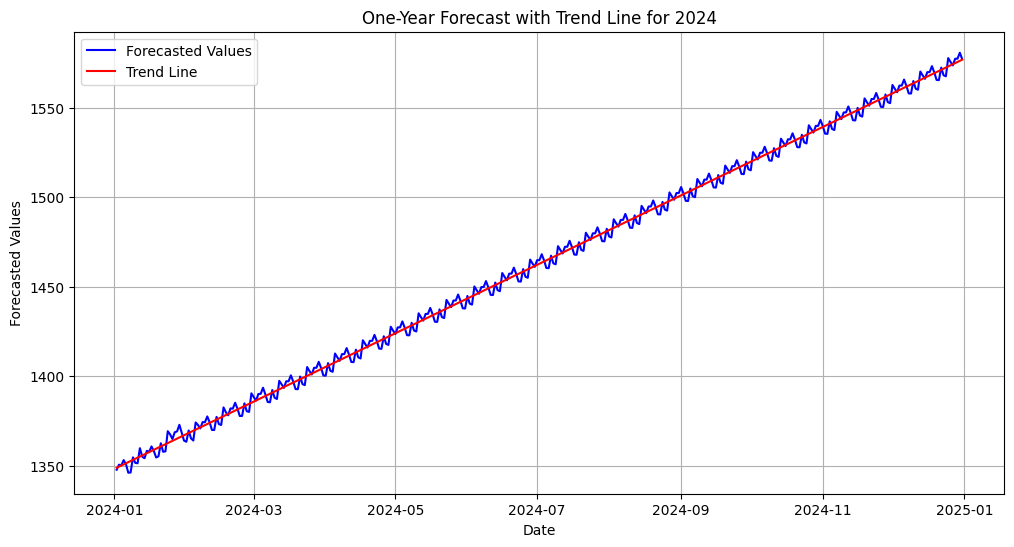

In [8]:
x = np.array([i.toordinal() for i in forecast_df.index])
y = forecast_df["Forecasted Values"]

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df["Forecasted Values"], label="Forecasted Values", color="blue")

# Add the trend line
plt.plot(forecast_df.index, y_pred, label="Trend Line", color="red")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Forecasted Values")
plt.title("One-Year Forecast with Trend Line for 2024")

# Display a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
